In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

### Upload aggregated overall suicide rates during 2014 to 2018

In [3]:
suicide_overall = pd.read_csv(r'Overall_Suicide_Aggregated/overall_2018_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_overall = suicide_overall.drop("Notes",1)
suicide_overall = suicide_overall.dropna(how = 'any')
suicide_overall['Deaths']=suicide_overall['Deaths'].astype(int)
suicide_overall['Population']=suicide_overall['Population'].astype(int)
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,53,277263,19.1,19.115425
1,"Baldwin County, AL",01003,208,1043033,19.9,19.941843
2,"Barbour County, AL",01005,18,129492,Unreliable,13.900473
3,"Bibb County, AL",01007,23,112800,20.4,20.390071
4,"Blount County, AL",01009,50,288949,17.3,17.304092


### Upload aggregated firearm suicide rates during 2014 to 2018

In [4]:
suicide_firearm = pd.read_csv(r'Firearm_Suicide_Aggregated/firearm_2018_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_firearm = suicide_firearm.drop("Notes",1)
suicide_firearm = suicide_firearm.dropna(how = 'any')
suicide_firearm['Deaths']=suicide_firearm['Deaths'].astype(int)
suicide_firearm['Population']=suicide_firearm['Population'].astype(int)
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,34,277263,12.3,12.262725
1,"Baldwin County, AL",01003,121,1043033,11.6,11.600783
2,"Barbour County, AL",01005,15,129492,Unreliable,11.583727
3,"Bibb County, AL",01007,17,112800,Unreliable,15.070922
4,"Blount County, AL",01009,34,288949,11.8,11.766782


### Upload aggregated non-firearm suicide rates during 2014 to 2018

In [5]:
suicide_nonfirearm = pd.read_csv(r'Nonfirearm_Suicide_Aggregated/nonfirearm_2018_aggregated.txt', sep='\t',dtype={"County Code": str})
suicide_nonfirearm = suicide_nonfirearm.drop("Notes",1)
suicide_nonfirearm = suicide_nonfirearm.dropna(how = 'any')
suicide_nonfirearm['Deaths']=suicide_nonfirearm['Deaths'].astype(int)
suicide_nonfirearm['Population']=suicide_nonfirearm['Population'].astype(int)
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,County,County Code,Deaths,Population,Crude Rate,SuicideDeathRate
0,"Autauga County, AL",01001,19,277263,Unreliable,6.852699
1,"Baldwin County, AL",01003,87,1043033,8.3,8.341059
2,"Blount County, AL",01009,16,288949,Unreliable,5.537309
3,"Calhoun County, AL",01015,25,575152,4.3,4.346677
4,"Chambers County, AL",01017,13,169370,Unreliable,7.675503


In [6]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2382
1,firearm,1967
2,nonfirearm,1498


### make up the missing non-firearm death records as many as possible

In [7]:
FS = suicide_firearm[['County Code', 'Deaths']]
FS = FS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_FS'})
NFS = suicide_nonfirearm[['County Code', 'Deaths']]
NFS = NFS.rename(columns = {'County Code': 'fips', 'Deaths': 'Deaths_NFS'})
suicide = suicide_overall[['County', 'County Code', 'Deaths', 'Population']]
suicide = suicide.rename(columns = {'County Code': 'fips'})

In [8]:
FS.head()

,fips,Deaths_FS
0,01001,34
1,01003,121
2,01005,15
3,01007,17
4,01009,34


In [9]:
NFS.head()

,fips,Deaths_NFS
0,01001,19
1,01003,87
2,01009,16
3,01015,25
4,01017,13


In [10]:
suicide.head()

,County,fips,Deaths,Population
0,"Autauga County, AL",01001,53,277263
1,"Baldwin County, AL",01003,208,1043033
2,"Barbour County, AL",01005,18,129492
3,"Bibb County, AL",01007,23,112800
4,"Blount County, AL",01009,50,288949


In [11]:
suicide = suicide.merge(FS, on = 'fips', how = 'left')
suicide = suicide.merge(NFS, on = 'fips', how = 'left')
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,277263,34.0,19.0
1,"Baldwin County, AL",01003,208,1043033,121.0,87.0
2,"Barbour County, AL",01005,18,129492,15.0,NaN
3,"Bibb County, AL",01007,23,112800,17.0,NaN
4,"Blount County, AL",01009,50,288949,34.0,16.0


In [12]:
suicide['Deaths_NFS'] = suicide['Deaths'] - suicide['Deaths_FS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,277263,34.0,19.0
1,"Baldwin County, AL",01003,208,1043033,121.0,87.0
2,"Barbour County, AL",01005,18,129492,15.0,3.0
3,"Bibb County, AL",01007,23,112800,17.0,6.0
4,"Blount County, AL",01009,50,288949,34.0,16.0


In [13]:
suicide['Deaths_FS'] = suicide['Deaths'] - suicide['Deaths_NFS']
suicide.head()

,County,fips,Deaths,Population,Deaths_FS,Deaths_NFS
0,"Autauga County, AL",01001,53,277263,34.0,19.0
1,"Baldwin County, AL",01003,208,1043033,121.0,87.0
2,"Barbour County, AL",01005,18,129492,15.0,3.0
3,"Bibb County, AL",01007,23,112800,17.0,6.0
4,"Blount County, AL",01009,50,288949,34.0,16.0


In [14]:
suicide_overall = suicide[['County', 'fips', 'Deaths', 'Population']]
suicide_overall['SuicideDeathRate'] = (suicide_overall['Deaths'] / suicide_overall['Population'])*100000
suicide_overall.head()

/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,53,277263,19.115425
1,"Baldwin County, AL",01003,208,1043033,19.941843
2,"Barbour County, AL",01005,18,129492,13.900473
3,"Bibb County, AL",01007,23,112800,20.390071
4,"Blount County, AL",01009,50,288949,17.304092


In [15]:
suicide_firearm = suicide[['County', 'fips', 'Deaths_FS', 'Population']]
suicide_firearm = suicide_firearm.rename(columns = {'Deaths_FS': 'Deaths'})
suicide_firearm['SuicideDeathRate'] = (suicide_firearm['Deaths'] / suicide_firearm['Population'])*100000
suicide_firearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,34.0,277263,12.262725
1,"Baldwin County, AL",01003,121.0,1043033,11.600783
2,"Barbour County, AL",01005,15.0,129492,11.583727
3,"Bibb County, AL",01007,17.0,112800,15.070922
4,"Blount County, AL",01009,34.0,288949,11.766782


In [16]:
suicide_nonfirearm = suicide[['County', 'fips', 'Deaths_NFS', 'Population']]
suicide_nonfirearm = suicide_nonfirearm.rename(columns = {'Deaths_NFS': 'Deaths'})
suicide_nonfirearm['SuicideDeathRate'] = (suicide_nonfirearm['Deaths'] / suicide_nonfirearm['Population'])*100000
suicide_nonfirearm.head()

,County,fips,Deaths,Population,SuicideDeathRate
0,"Autauga County, AL",01001,19.0,277263,6.852699
1,"Baldwin County, AL",01003,87.0,1043033,8.341059
2,"Barbour County, AL",01005,3.0,129492,2.316745
3,"Bibb County, AL",01007,6.0,112800,5.319149
4,"Blount County, AL",01009,16.0,288949,5.537309


In [17]:
suicide_overall = suicide_overall.dropna()
suicide_firearm = suicide_firearm.dropna()
suicide_nonfirearm = suicide_nonfirearm.dropna()

In [18]:
amount = [suicide_overall.shape[0], suicide_firearm.shape[0], suicide_nonfirearm.shape[0]]
data = {'Suicide Type': ['overall', 'firearm', 'nonfirearm'],
       'County Amount': amount}
df_amount = pd.DataFrame(data)
df_amount

,Suicide Type,County Amount
0,overall,2382
1,firearm,1967
2,nonfirearm,1967


In [19]:
suicide_overall['Suicide Type'] = 'Overall'
suicide_firearm['Suicide Type'] = 'Firearm'
suicide_nonfirearm['Suicide Type'] = 'Nonfirearm'

In [20]:
frames = [suicide_overall, suicide_firearm, suicide_nonfirearm]
suicide = pd.concat(frames)
suicide['year'] = '2018'
suicide.head()

,County,fips,Deaths,Population,SuicideDeathRate,Suicide Type,year
0,"Autauga County, AL",01001,53.0,277263,19.115425,Overall,2018
1,"Baldwin County, AL",01003,208.0,1043033,19.941843,Overall,2018
2,"Barbour County, AL",01005,18.0,129492,13.900473,Overall,2018
3,"Bibb County, AL",01007,23.0,112800,20.390071,Overall,2018
4,"Blount County, AL",01009,50.0,288949,17.304092,Overall,2018


In [21]:
suicide.shape

(6316, 7)

In [22]:
suicide.to_csv('suicide_all_types_2018.csv')

## uploading environmental data

In [23]:
ur_files = ddf.read_csv('Climate_Factors/climate_factors_aggregated_2018.csv', dtype = {'fips': str})
climate = ur_files.compute()
climate = climate.loc[:, ~climate.columns.str.contains('^Unnamed')]
climate = climate.drop(['county'], axis = 1)
climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone
0,01001,66.272479,56.658627,9.404546,4.215983,0.174213,0.137203,0.507648,0.005504,0.0,0.157533,71.216544,65.946904,10.48,0.0
1,01003,68.458562,NaN,NaN,5.563459,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.86,0.8
2,01005,67.260653,57.394492,9.219023,3.061397,0.140646,0.124597,0.402900,0.006039,0.0,0.216251,70.704747,67.009842,10.00,0.0
3,01007,64.572494,54.792228,9.102168,3.418144,0.167484,0.106273,0.389953,0.009311,0.0,0.144575,70.666741,64.051080,10.16,0.4
4,01009,60.894188,NaN,NaN,4.021411,0.155742,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.46,0.8


## uploading social economic data

In [24]:
ur_files = ddf.read_csv('Social_Economic_Factors/Social_Economic_2018.csv', dtype = {'fips': str, 'per_capita_income': float})
social = ur_files.compute()
social = social.loc[:, ~social.columns.str.contains('^Unnamed')]
social = social.drop(['year'], axis = 1)
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality
0,01001,29372.0,15.378435,11.704246,15.856113,5.640540,19.585364,1.416055,3.800129,14.583333,3.280898,24.978261,35.569866,0.989130,24.766250,21.248188,13.358696,14.226449,12.364130,3.0
1,01003,31203.0,10.566099,10.242263,11.942387,3.440513,20.886404,1.260461,18.305418,19.540429,5.112520,16.981168,24.767155,1.448293,20.982260,18.628398,12.194208,13.613189,14.074971,4.0
2,01005,18461.0,28.863318,28.085622,28.402238,9.242325,32.529277,3.407359,1.273352,17.973780,5.596097,53.851524,39.629877,11.248158,50.643856,22.682492,12.039407,13.389186,12.830657,6.0
3,01007,20199.0,13.987688,17.826362,26.551184,5.994152,29.598085,0.760234,2.423316,16.251609,2.126859,25.418387,30.168042,9.282195,28.608526,22.919164,12.851245,15.266125,12.030008,2.0
4,01009,22656.0,14.400336,20.962980,24.274106,4.155340,26.114537,1.645631,0.871109,17.751756,7.187962,12.859745,25.695857,0.941972,24.148952,19.665192,12.408708,13.786105,13.024547,2.0


## uploading altitude data

In [25]:
ur_files = ddf.read_csv('county_altitude.csv', dtype = {'FIPSCODE': str})
altitude = ur_files.compute()
altitude = altitude.rename(columns = {'FIPSCODE': 'fips', 'elevation': 'altitude'})
altitude = altitude[['fips', 'altitude']]
altitude.head()

,fips,altitude
0,19107,207.03
1,19189,390.25
2,19029,385.95
3,19015,268.98
4,19059,425.89


In [26]:
social = social.merge(altitude, on = 'fips', how = 'left')
social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude
0,01001,29372.0,15.378435,11.704246,15.856113,5.640540,19.585364,1.416055,3.800129,14.583333,...,24.978261,35.569866,0.989130,24.766250,21.248188,13.358696,14.226449,12.364130,3.0,128.66
1,01003,31203.0,10.566099,10.242263,11.942387,3.440513,20.886404,1.260461,18.305418,19.540429,...,16.981168,24.767155,1.448293,20.982260,18.628398,12.194208,13.613189,14.074971,4.0,30.30
2,01005,18461.0,28.863318,28.085622,28.402238,9.242325,32.529277,3.407359,1.273352,17.973780,...,53.851524,39.629877,11.248158,50.643856,22.682492,12.039407,13.389186,12.830657,6.0,122.81
3,01007,20199.0,13.987688,17.826362,26.551184,5.994152,29.598085,0.760234,2.423316,16.251609,...,25.418387,30.168042,9.282195,28.608526,22.919164,12.851245,15.266125,12.030008,2.0,74.90
4,01009,22656.0,14.400336,20.962980,24.274106,4.155340,26.114537,1.645631,0.871109,17.751756,...,12.859745,25.695857,0.941972,24.148952,19.665192,12.408708,13.786105,13.024547,2.0,184.46


In [27]:
climate.shape[0]

3142

In [28]:
social.shape[0]

3220

# Check SHAP value with overall suicide rates in 2382 counties

In [29]:
suicide_social = social.merge(suicide_overall[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,29372.0,15.378435,11.704246,15.856113,5.640540,19.585364,1.416055,3.800129,14.583333,...,35.569866,0.989130,24.766250,21.248188,13.358696,14.226449,12.364130,3.0,128.66,19.115425
1,01003,31203.0,10.566099,10.242263,11.942387,3.440513,20.886404,1.260461,18.305418,19.540429,...,24.767155,1.448293,20.982260,18.628398,12.194208,13.613189,14.074971,4.0,30.30,19.941843
2,01005,18461.0,28.863318,28.085622,28.402238,9.242325,32.529277,3.407359,1.273352,17.973780,...,39.629877,11.248158,50.643856,22.682492,12.039407,13.389186,12.830657,6.0,122.81,13.900473
3,01007,20199.0,13.987688,17.826362,26.551184,5.994152,29.598085,0.760234,2.423316,16.251609,...,30.168042,9.282195,28.608526,22.919164,12.851245,15.266125,12.030008,2.0,74.90,20.390071
4,01009,22656.0,14.400336,20.962980,24.274106,4.155340,26.114537,1.645631,0.871109,17.751756,...,25.695857,0.941972,24.148952,19.665192,12.408708,13.786105,13.024547,2.0,184.46,17.304092


In [45]:
suicide_climate = climate.merge(suicide_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
suicide_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,66.272479,56.658627,9.404546,4.215983,0.174213,0.137203,0.507648,0.005504,0.0,0.157533,71.216544,65.946904,10.48,0.0,3.0,128.66,19.115425
1,01003,68.458562,NaN,NaN,5.563459,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.86,0.8,4.0,30.30,19.941843
2,01005,67.260653,57.394492,9.219023,3.061397,0.140646,0.124597,0.402900,0.006039,0.0,0.216251,70.704747,67.009842,10.00,0.0,6.0,122.81,13.900473
3,01007,64.572494,54.792228,9.102168,3.418144,0.167484,0.106273,0.389953,0.009311,0.0,0.144575,70.666741,64.051080,10.16,0.4,2.0,74.90,20.390071
4,01009,60.894188,NaN,NaN,4.021411,0.155742,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.46,0.8,2.0,184.46,17.304092


### SHAP - Socioeconomic factors + altitude + rurality

In [31]:
import xgboost
import shap
import copy    

In [32]:
suicide_social = suicide_social.dropna()
suicide_social.shape[0]

2360

In [33]:
X = suicide_social.iloc[:, 1:-1]
y = suicide_social.iloc[:, -1].array

In [34]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


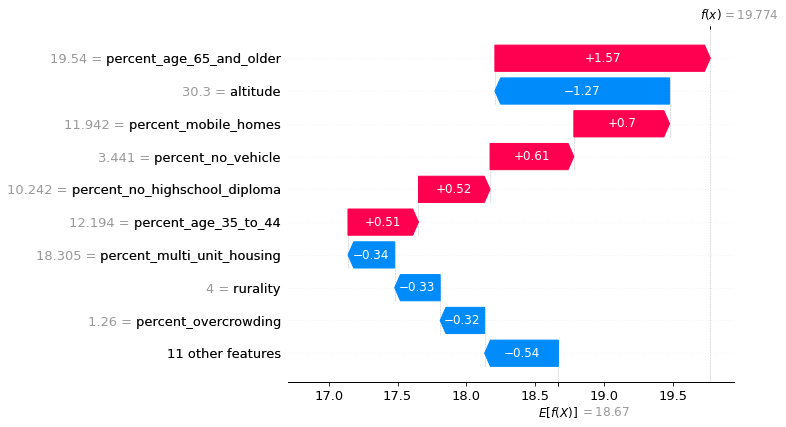

In [35]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

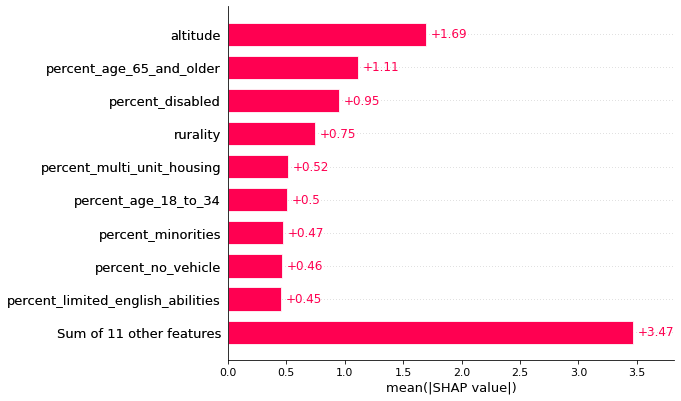

In [36]:
shap.plots.bar(shap_values)

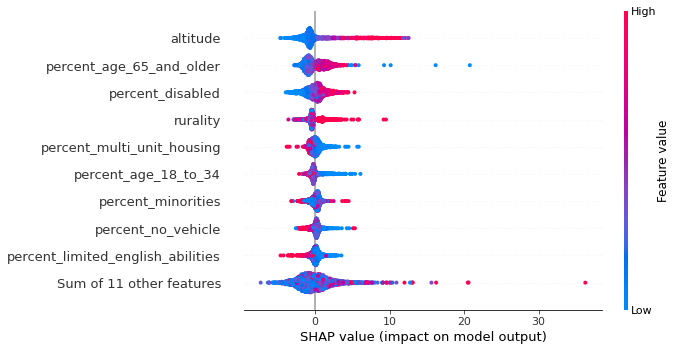

In [37]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

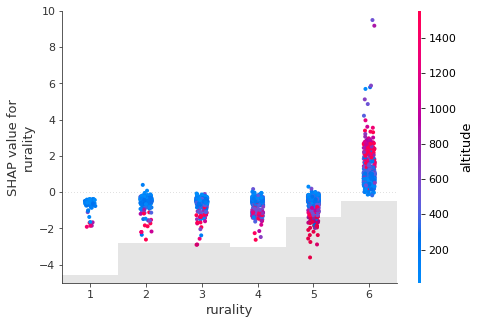

In [38]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 10)

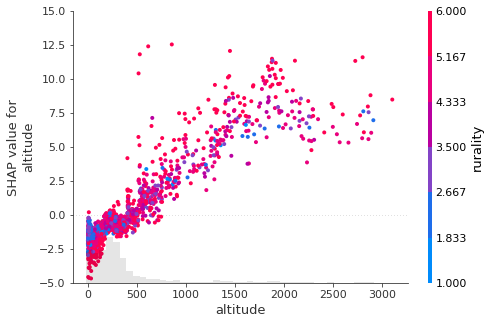

In [39]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

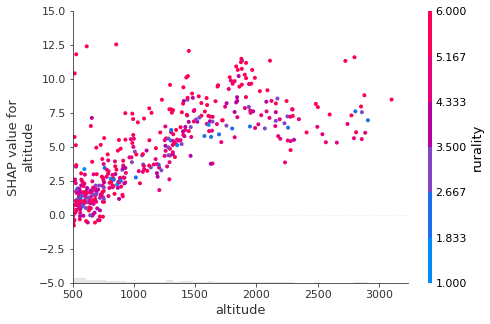

In [40]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

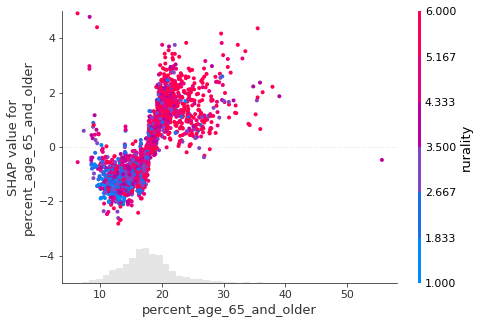

In [41]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

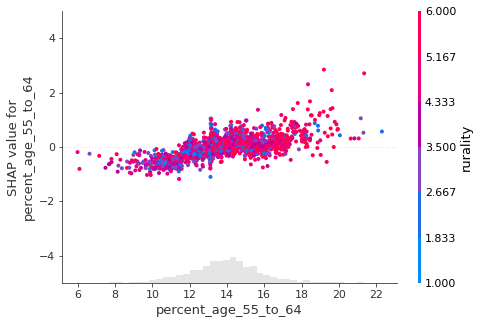

In [42]:
shap.plots.scatter(shap_values[:,"percent_age_55_to_64"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

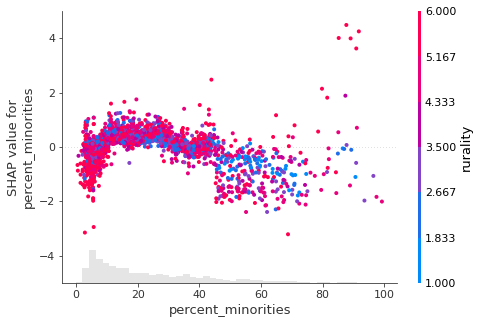

In [43]:
shap.plots.scatter(shap_values[:,"percent_minorities"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

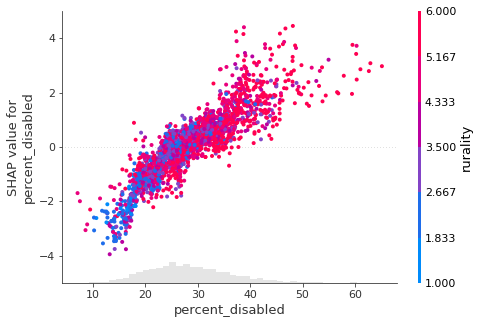

In [44]:
shap.plots.scatter(shap_values[:,"percent_disabled"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

### SHAP - climate factors + altitude + rurality

In [46]:
suicide_climate = suicide_climate.dropna()
suicide_climate.shape[0]

2242

In [47]:
X = suicide_climate.iloc[:, 1:-1]
y = suicide_climate.iloc[:, -1].array

In [48]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


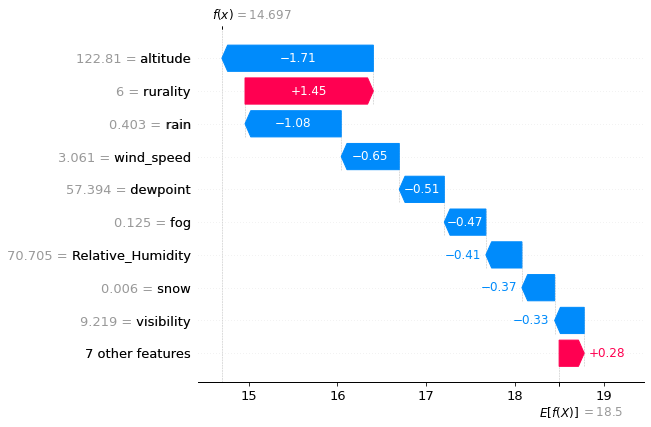

In [49]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

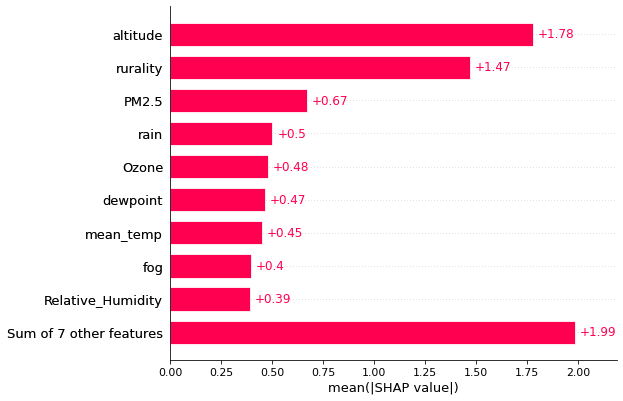

In [50]:
shap.plots.bar(shap_values)

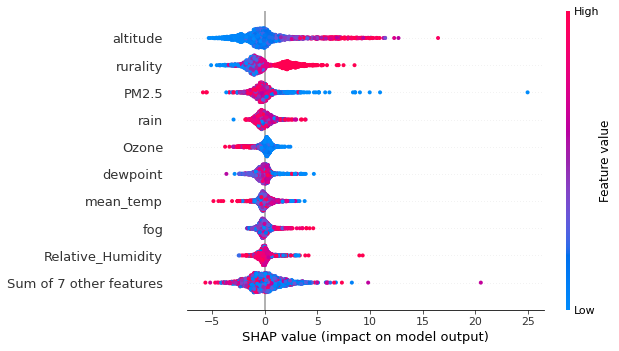

In [51]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

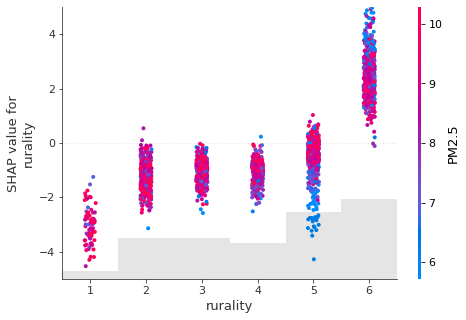

In [52]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"PM2.5"], ymin = -5, ymax = 5)

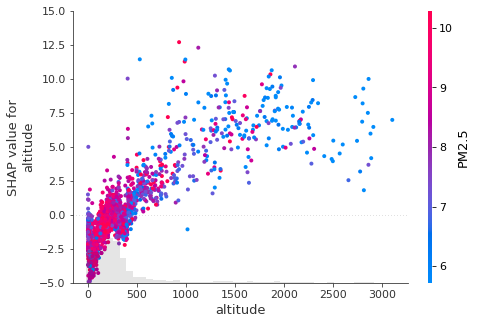

In [55]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"PM2.5"], ymin = -5, ymax = 15)

# Check SHAP value with firearm suicide rates in 1948 counties

### socioeconomic factors + rurality + altitude

In [56]:
firearm_social = social.merge(suicide_firearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,29372.0,15.378435,11.704246,15.856113,5.640540,19.585364,1.416055,3.800129,14.583333,...,35.569866,0.989130,24.766250,21.248188,13.358696,14.226449,12.364130,3.0,128.66,12.262725
1,01003,31203.0,10.566099,10.242263,11.942387,3.440513,20.886404,1.260461,18.305418,19.540429,...,24.767155,1.448293,20.982260,18.628398,12.194208,13.613189,14.074971,4.0,30.30,11.600783
2,01005,18461.0,28.863318,28.085622,28.402238,9.242325,32.529277,3.407359,1.273352,17.973780,...,39.629877,11.248158,50.643856,22.682492,12.039407,13.389186,12.830657,6.0,122.81,11.583727
3,01007,20199.0,13.987688,17.826362,26.551184,5.994152,29.598085,0.760234,2.423316,16.251609,...,30.168042,9.282195,28.608526,22.919164,12.851245,15.266125,12.030008,2.0,74.90,15.070922
4,01009,22656.0,14.400336,20.962980,24.274106,4.155340,26.114537,1.645631,0.871109,17.751756,...,25.695857,0.941972,24.148952,19.665192,12.408708,13.786105,13.024547,2.0,184.46,11.766782


In [57]:
firearm_social = firearm_social.dropna()
firearm_social.shape[0]

1948

In [59]:
X = firearm_social.iloc[:, 1:-1]
y = firearm_social.iloc[:, -1].array

In [60]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


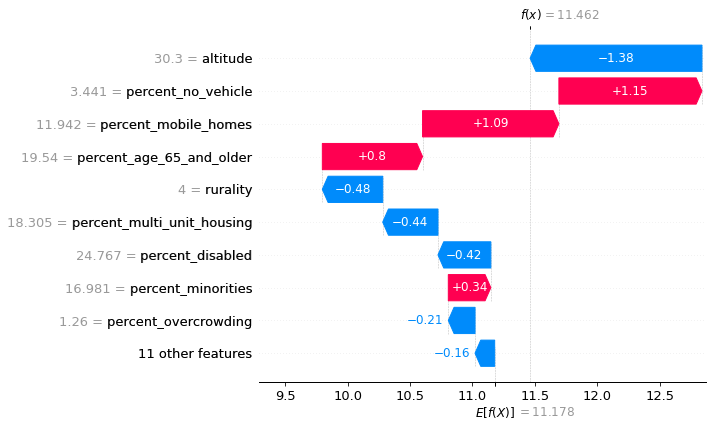

In [61]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

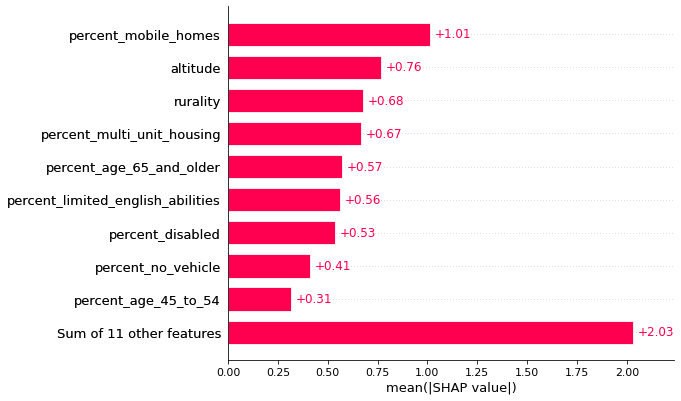

In [62]:
shap.plots.bar(shap_values)

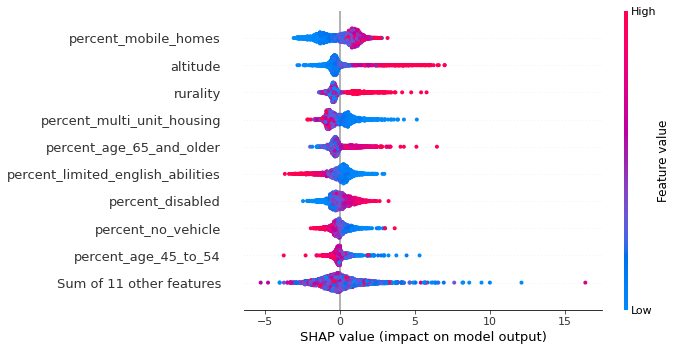

In [63]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

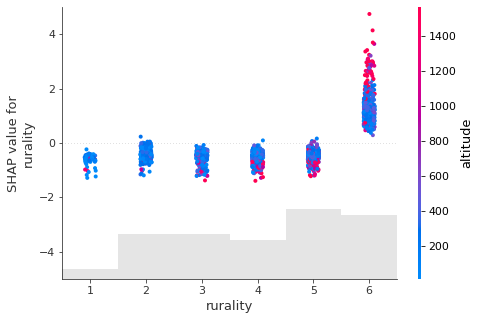

In [64]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

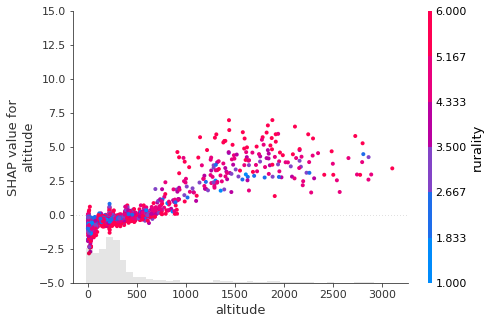

In [65]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

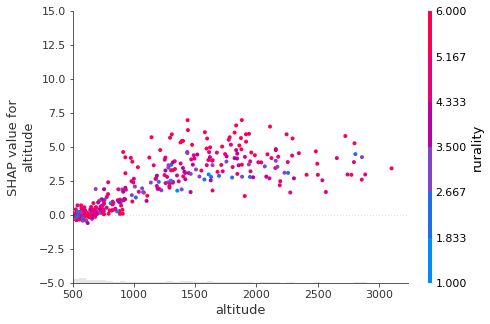

In [68]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15, xmin = 500)

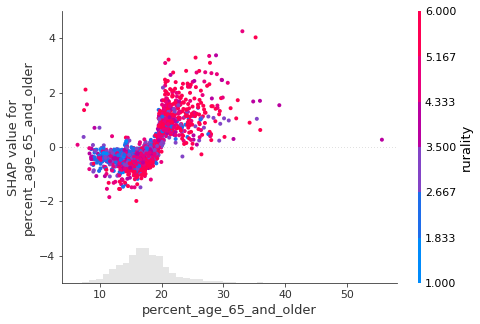

In [69]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

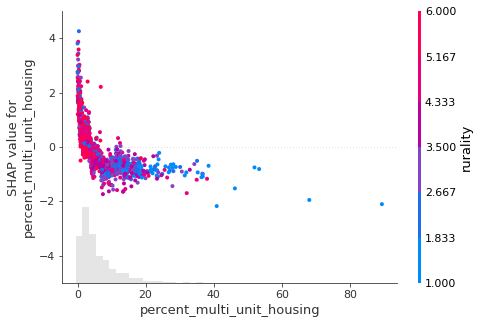

In [70]:
shap.plots.scatter(shap_values[:,"percent_multi_unit_housing"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

### climate + rurality + altitude

In [71]:
firearm_climate = climate.merge(firearm_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
firearm_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,66.272479,56.658627,9.404546,4.215983,0.174213,0.137203,0.507648,0.005504,0.0,0.157533,71.216544,65.946904,10.48,0.0,3.0,128.66,12.262725
1,01003,68.458562,NaN,NaN,5.563459,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.86,0.8,4.0,30.30,11.600783
2,01005,67.260653,57.394492,9.219023,3.061397,0.140646,0.124597,0.402900,0.006039,0.0,0.216251,70.704747,67.009842,10.00,0.0,6.0,122.81,11.583727
3,01007,64.572494,54.792228,9.102168,3.418144,0.167484,0.106273,0.389953,0.009311,0.0,0.144575,70.666741,64.051080,10.16,0.4,2.0,74.90,15.070922
4,01009,60.894188,NaN,NaN,4.021411,0.155742,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.46,0.8,2.0,184.46,11.766782


In [72]:
firearm_climate = firearm_climate.dropna()
firearm_climate.shape[0]

1852

In [73]:
X = firearm_climate.iloc[:, 1:-1]
y = firearm_climate.iloc[:, -1].array

In [74]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


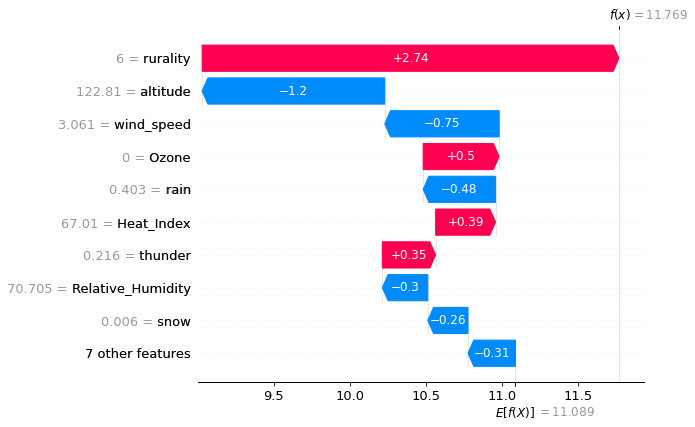

In [75]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

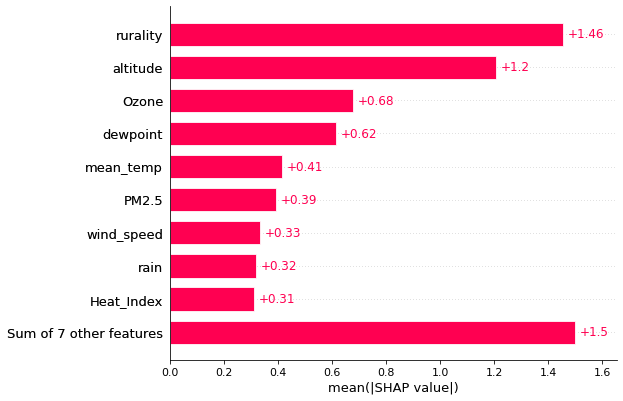

In [76]:
shap.plots.bar(shap_values)

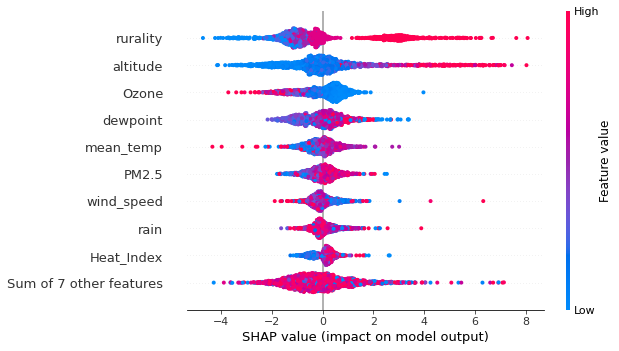

In [77]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

# Check SHAP values with nonfirearm suicide rates in 1950 counties

### social economic factors + rurality + altitude

In [80]:
nonfirearm_social = social.merge(suicide_nonfirearm[['fips', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_social.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,percent_age_18_to_34,percent_age_35_to_44,percent_age_45_to_54,percent_age_55_to_64,rurality,altitude,SuicideDeathRate
0,01001,29372.0,15.378435,11.704246,15.856113,5.640540,19.585364,1.416055,3.800129,14.583333,...,35.569866,0.989130,24.766250,21.248188,13.358696,14.226449,12.364130,3.0,128.66,6.852699
1,01003,31203.0,10.566099,10.242263,11.942387,3.440513,20.886404,1.260461,18.305418,19.540429,...,24.767155,1.448293,20.982260,18.628398,12.194208,13.613189,14.074971,4.0,30.30,8.341059
2,01005,18461.0,28.863318,28.085622,28.402238,9.242325,32.529277,3.407359,1.273352,17.973780,...,39.629877,11.248158,50.643856,22.682492,12.039407,13.389186,12.830657,6.0,122.81,2.316745
3,01007,20199.0,13.987688,17.826362,26.551184,5.994152,29.598085,0.760234,2.423316,16.251609,...,30.168042,9.282195,28.608526,22.919164,12.851245,15.266125,12.030008,2.0,74.90,5.319149
4,01009,22656.0,14.400336,20.962980,24.274106,4.155340,26.114537,1.645631,0.871109,17.751756,...,25.695857,0.941972,24.148952,19.665192,12.408708,13.786105,13.024547,2.0,184.46,5.537309


In [81]:
nonfirearm_social = nonfirearm_social.dropna()
nonfirearm_social.shape[0]

1948

In [82]:
X = nonfirearm_social.iloc[:, 1:-1]
y = nonfirearm_social.iloc[:, -1].array

In [83]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


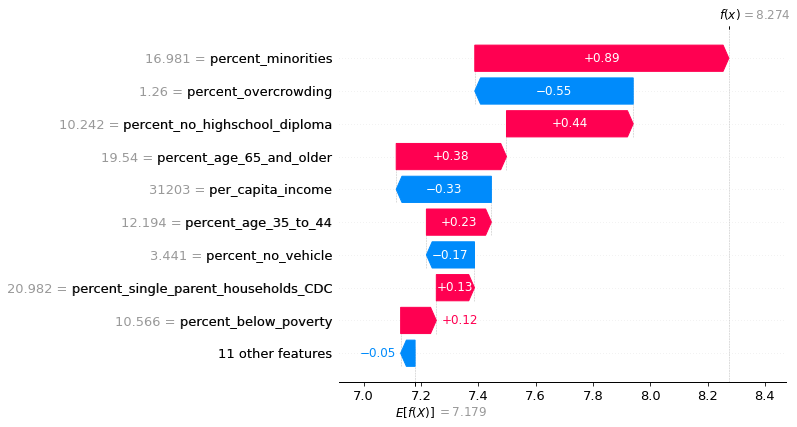

In [84]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

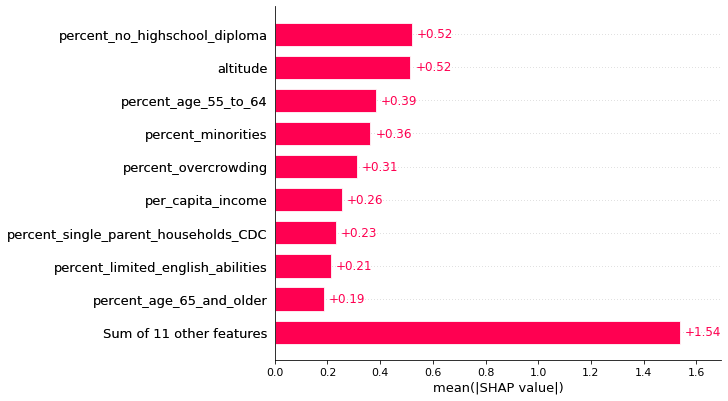

In [85]:
shap.plots.bar(shap_values)

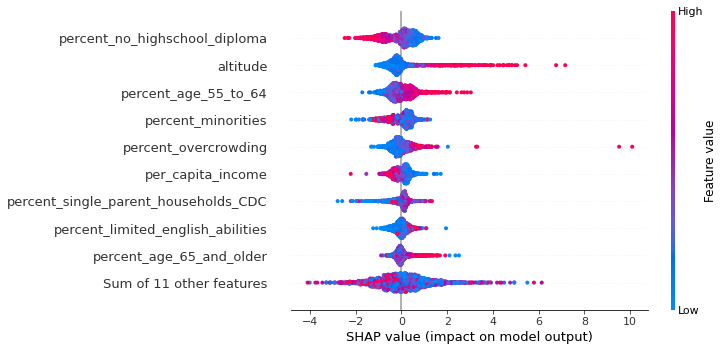

In [86]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

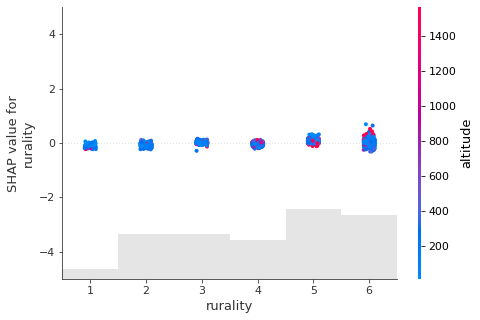

In [87]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

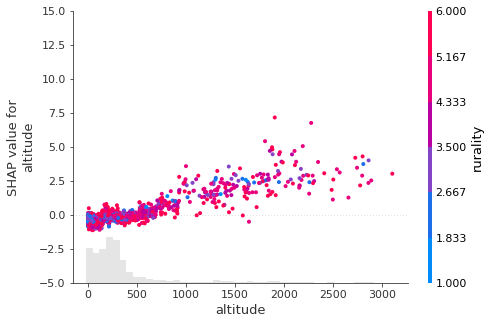

In [88]:
shap.plots.scatter(shap_values[:,"altitude"], color=shap_values[:,"rurality"], ymin = -5, ymax = 15)

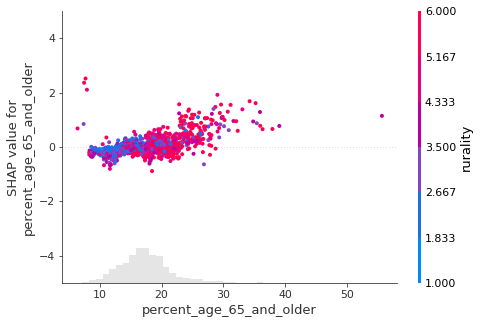

In [89]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"rurality"], ymin = -5, ymax = 5)

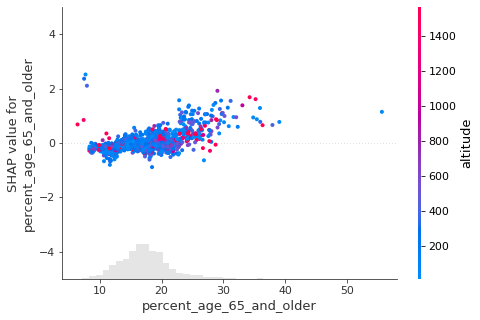

In [90]:
shap.plots.scatter(shap_values[:,"percent_age_65_and_older"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)

### climate + rurality + altitude

In [91]:
nonfirearm_climate = climate.merge(nonfirearm_social[['fips', 'rurality', 'altitude', 'SuicideDeathRate']], on = 'fips', how = 'left')
nonfirearm_climate.head()

,fips,mean_temp,dewpoint,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,PM2.5,Ozone,rurality,altitude,SuicideDeathRate
0,01001,66.272479,56.658627,9.404546,4.215983,0.174213,0.137203,0.507648,0.005504,0.0,0.157533,71.216544,65.946904,10.48,0.0,3.0,128.66,6.852699
1,01003,68.458562,NaN,NaN,5.563459,0.032803,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,7.86,0.8,4.0,30.30,8.341059
2,01005,67.260653,57.394492,9.219023,3.061397,0.140646,0.124597,0.402900,0.006039,0.0,0.216251,70.704747,67.009842,10.00,0.0,6.0,122.81,2.316745
3,01007,64.572494,54.792228,9.102168,3.418144,0.167484,0.106273,0.389953,0.009311,0.0,0.144575,70.666741,64.051080,10.16,0.4,2.0,74.90,5.319149
4,01009,60.894188,NaN,NaN,4.021411,0.155742,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,10.46,0.8,2.0,184.46,5.537309


In [92]:
nonfirearm_climate = nonfirearm_climate.dropna()
nonfirearm_climate.shape[0]

1852

In [93]:
X = nonfirearm_climate.iloc[:, 1:-1]
y = nonfirearm_climate.iloc[:, -1].array

In [94]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


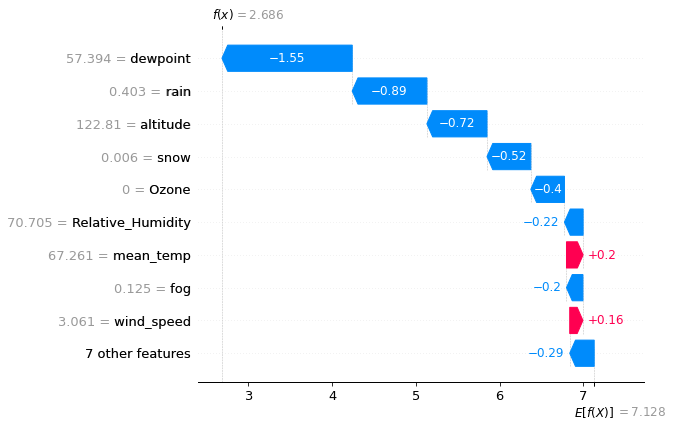

In [95]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

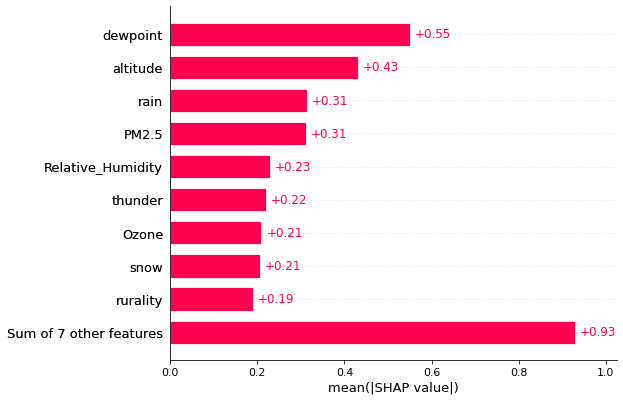

In [96]:
shap.plots.bar(shap_values)

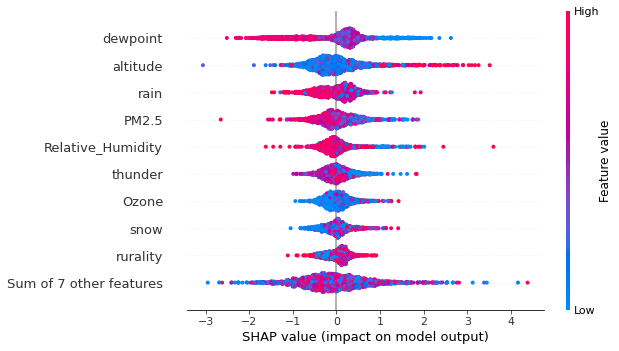

In [97]:
shap.plots.beeswarm(copy.deepcopy(shap_values))

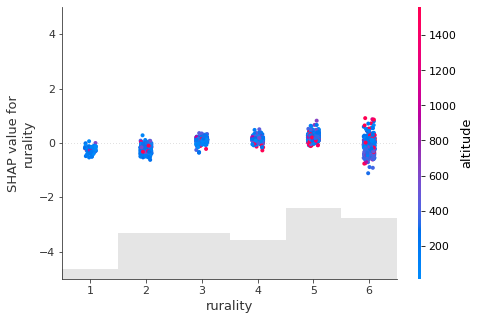

In [98]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values[:,"altitude"], ymin = -5, ymax = 5)